In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null(empty).
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [11]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()


city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [17]:
# Create the Urban, Suburban, and Rural city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [18]:
# CHALLENGE: total rides

total_rides = pyber_data_df.groupby('type').count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [19]:
# CHALLENGE: total drivers

total_drivers = city_data_df.groupby('type').sum()['driver_count']
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [20]:
#CHALLENGE: total fares

total_fares = pyber_data_df.groupby('type').sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [21]:
#CHALLENGE: average fare per ride
average_fare_ride = pyber_data_df.groupby('type').sum()['fare']/pyber_data_df.groupby('type').count()['ride_id']
average_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [22]:
# CHALLENGE: average fare per driver

average_fare_driver = pyber_data_df.groupby('type').sum()['fare']/city_data_df.groupby('type').sum()['driver_count']
average_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [23]:
#CHALLENGE: create summary data frame

summary_data_df= pd.DataFrame({
        "Total Rides": total_rides,
        "Total Drivers": total_drivers,
        "Total Fares": total_fares,
        "Average Fare per Ride": average_fare_ride,
        "Average Fare per Driver": average_fare_driver
})
summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [24]:
# CHALLENGE: Format each column
summary_data_df["Total Rides"] = summary_data_df["Total Rides"].map("{:,}".format)

summary_data_df["Total Drivers"] = summary_data_df["Total Drivers"].map("{:,}".format)

summary_data_df["Total Fares"] = summary_data_df["Total Fares"].map("${:,.2f}".format)

summary_data_df["Average Fare per Ride"] = summary_data_df["Average Fare per Ride"].map("${:.2f}".format)

summary_data_df["Average Fare per Driver"] = summary_data_df["Average Fare per Driver"].map("${:.2f}".format)

# Remove index names
summary_data_df.index.name= None 

summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [25]:
# CHALLENGE: rename columns

pyber_df= pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

pyber_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [26]:
# CHALLENGE: set index to the date column

pyber_df= pyber_df.set_index("Date")

pyber_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [27]:
#CHALLENGE: New data frame for fare
new_pyber_df = pyber_df[['City Type', 'Fare']].copy()

new_pyber_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [28]:
#CHALLENGE: set index to the datetime data type
new_pyber_df.index = pd.to_datetime(new_pyber_df.index)

new_pyber_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [29]:
# CHALLENGE: calculate sum of fares by the city and date & convert the groupby Series into a DataFrame.

total_citytype_fare= new_pyber_df.groupby(['Date','City Type']).sum()['Fare'].to_frame()

total_citytype_fare


,,Fare
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [30]:
#CHALLENGE: reset the index

total_citytype_fare = total_citytype_fare.reset_index()
total_citytype_fare

,Date,City Type,Fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [31]:
# CHALLLENGE: create a pivot table dataframe
total_citytype_fare_pivot= total_citytype_fare.pivot(index="Date", columns= "City Type")['Fare']
total_citytype_fare_pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [32]:
# CHALLENGE: create new dataframe from the pivot table
dates_df= total_citytype_fare_pivot.loc['2019-01-01':'2019-04-28']
dates_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [33]:
# CHALLENGE: create new dataframe in weekly bins
weekly_fares= dates_df.resample("W").sum()
weekly_fares



City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


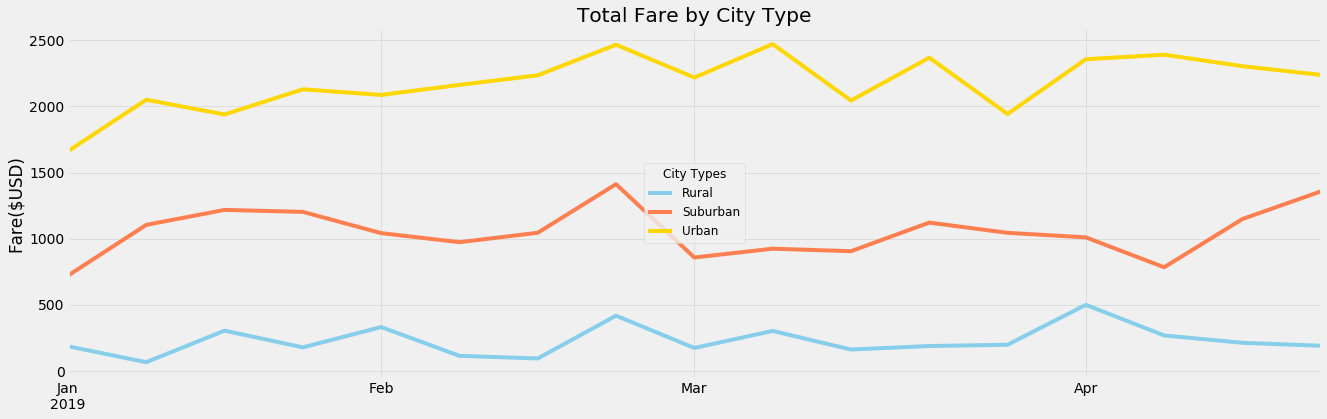

In [76]:
#CHALLENGE: plot the dataframe
plt.style.use('fivethirtyeight')
weekly_fares.plot(label='City Type', color=("skyblue","coral","gold"), figsize=(20,6))
plt.title("Total Fare by City Type")
plt.grid(alpha=.5)
plt.ylabel("Fare($USD)")
plt.xlabel("")
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="center", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


plt.savefig("./Analysis/fig8.png")
